In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Create our session (link) from Python to the DB
session = Session(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station_list = Base.classes.station
stat_query = session.query(station_list)

measurement_list = Base.classes.measurement
meas_query = session.query(measurement_list)

In [21]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent = session.query(measurement_list.date).order_by(measurement_list.date.desc()).first()
recent

('2017-08-23',)

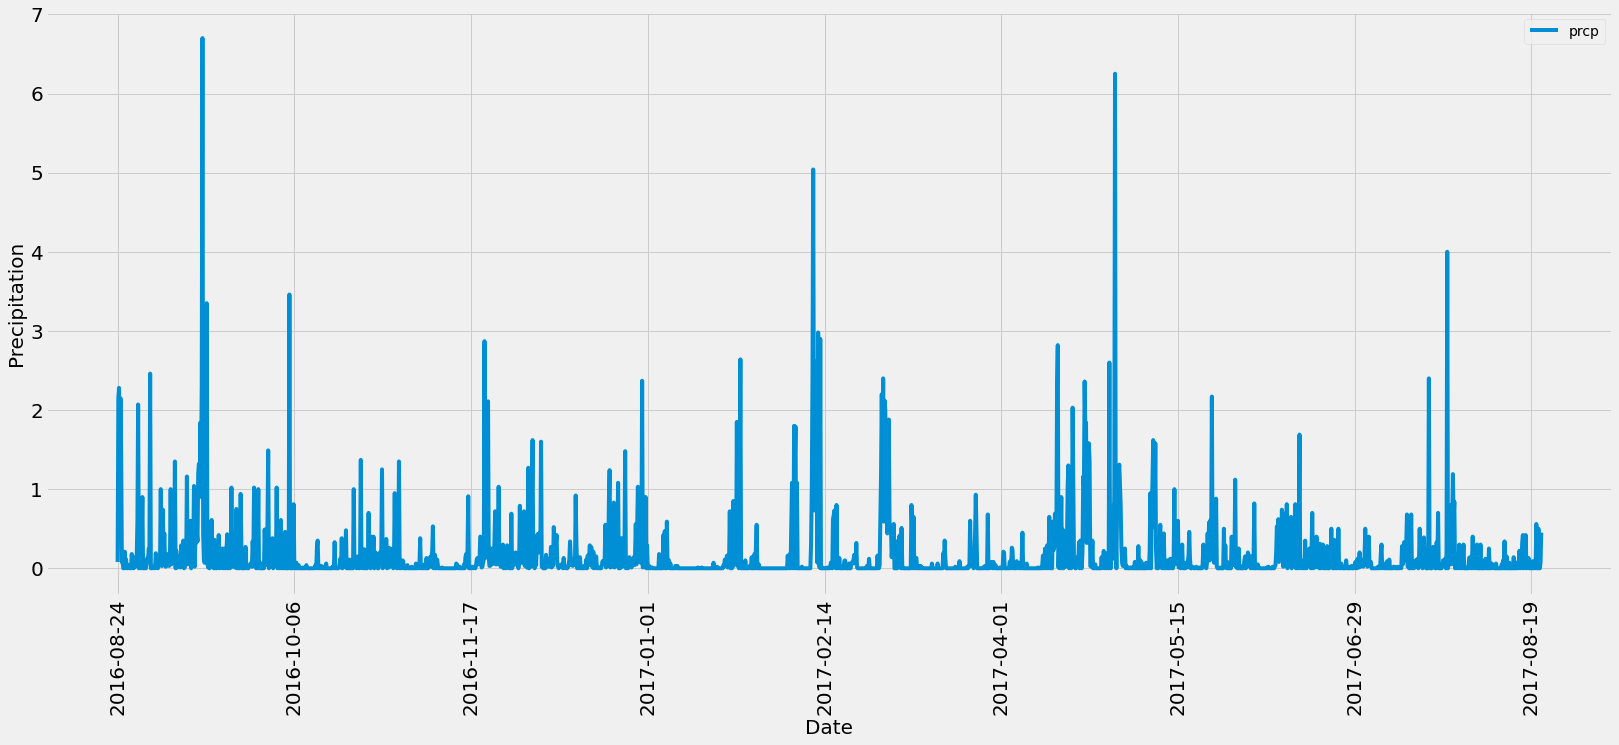

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores (add the precepitation column)
precipitation = session.query(measurement_list.date, measurement_list.prcp).filter(measurement_list.date > year_ago).order_by(measurement_list.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
pre_df = pd.DataFrame(precipitation, columns= ['date', 'prcp']).dropna()

# Sort the dataframe by date
pre_df.sort_values(by = 'date', ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
pre_df.plot(x='date', y= 'prcp', rot=90, figsize= (25,10))
plt.xlabel('Date', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 20)
plt.ylabel('Precipitation', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stat_count = stat_query.count()
stat_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stat_order = session.query(measurement_list.station, func.count(measurement_list.station))\
.group_by(measurement_list.station)\
.order_by(func.count(measurement_list.station).desc()).all()
print(stat_order[0])

('USC00519281', 2772)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement_list.tobs), func.avg(measurement_list.tobs), func.max(measurement_list.tobs)).filter(measurement_list.station == 'USC00519281').all()
print(most_active)

[(54.0, 71.66378066378067, 85.0)]


<AxesSubplot:ylabel='Frequency'>

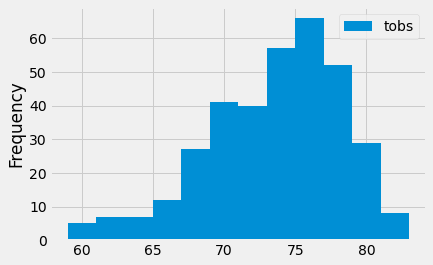

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement_list.tobs).filter(measurement_list.date > year_ago).filter(measurement_list.station == 'USC00519281').all()
tobs_df = pd.DataFrame(tobs, columns = ['tobs'])
tobs_df.plot.hist(bins= 12)

# Close session

In [19]:
# Close Session
session.close()